# $\hat{\theta}$ frequency calculator

In [3]:
from posterior3 import *

%matplotlib inline

### Generate dataset

In [5]:
data, labels, theta_hats = generate_data(n_items=len(THETAS) * 125, 
                                         verbose=False)

100%|██████████| 1000/1000 [00:00<00:00, 2571.47it/s]


Generating 1000 items of data...


##### Get info on $\hat{\Theta}$ frequency

In [6]:
theta_hat_freq = dict()

for theta_hat in theta_hats:
    theta_hat_string = ''.join(theta_hat)
    theta_hat_freq.setdefault(theta_hat_string, 0)
    theta_hat_freq[theta_hat_string] += 1

In [7]:
final_freq = np.zeros(len(ENUM_THETA))

for theta_hat_string in REV_ENUM_THETA:
    theta_hat_freq.setdefault(theta_hat_string, 0)
    key = REV_ENUM_THETA[theta_hat_string]
    final_freq[key] = theta_hat_freq[theta_hat_string]
    
final_freq = final_freq / final_freq.sum()

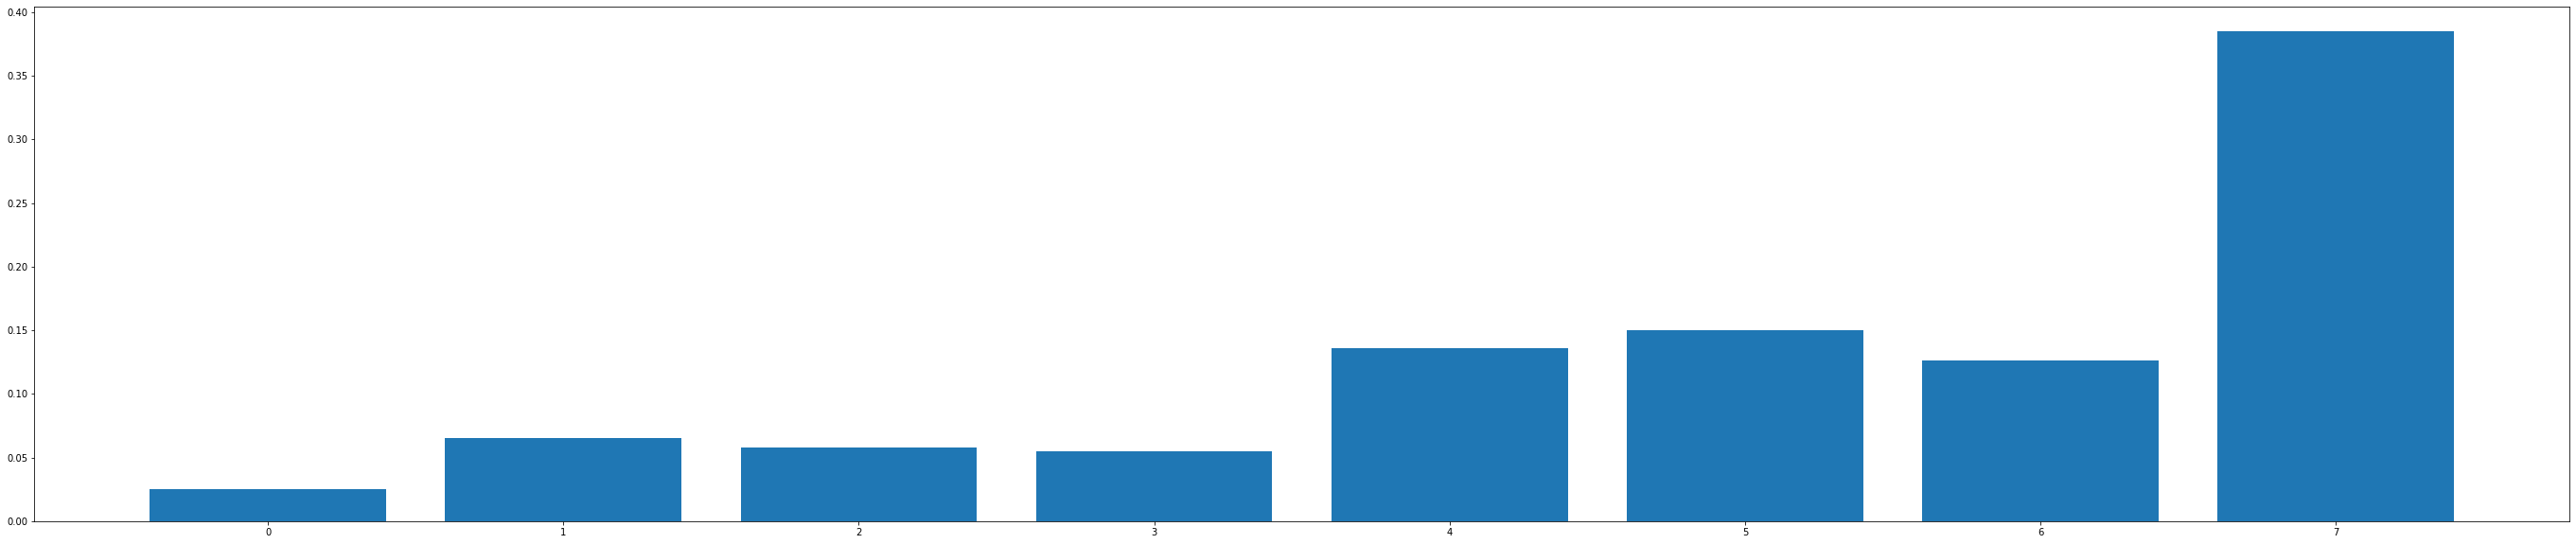

In [10]:
plt.figure(figsize=(48, 10))
plt.bar(np.arange(len(final_freq)), final_freq)
plt.savefig("posterior3/theta_hat_freq.png")
plt.show()

In [11]:
pd.DataFrame(final_freq).to_csv(f"posterior3/theta_hat_freq.csv", index_label="theta_hat_idx")